In [1]:
!pip list

Package                       Version
----------------------------- --------------------
absl-py                       1.4.0
alabaster                     0.7.13
albumentations                1.2.1
altair                        4.2.2
anyio                         3.6.2
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
array-record                  0.2.0
arviz                         0.15.1
astropy                       5.2.2
astunparse                    1.6.3
attrs                         23.1.0
audioread                     3.0.0
autograd                      1.5
Babel                         2.12.1
backcall                      0.2.0
beautifulsoup4                4.11.2
bleach                        6.0.0
blis                          0.7.9
blosc2                        2.0.0
bokeh                         2.4.3
branca                        0.6.0
build                         0.10.0
CacheControl                  0.12.11
cac

IMPORTING REQUIRED LIBRARIES

In [67]:
import tensorflow as tf
import os
import numpy
import cv2
import imghdr
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Softmax

In [3]:
gpus=tf.config.experimental.list_physical_devices('GPU')
for i in gpus:
  tf.config.experimental.set_memory_growth(i,True)

In [4]:
print(gpus)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
exts=['jpg','jpeg','bmp','png']

In [7]:
dirr='/content/gdrive/MyDrive/image_classification'

In [8]:
for ic in os.listdir(dirr):
  for image in os.listdir(os.path.join(dirr,ic)):
    path=os.path.join(dirr,ic,image)
    try:
      img=cv2.imread(path)
      ext=imghdr.what(path)
      if ext not in exts:
        print('image not in ext list{}'.format(path))
        os.remove(path)
    except Exception as e:
      print('issue with image {}'.format(path))

image not in ext list/content/gdrive/MyDrive/image_classification/happy/portrait-smiling-young-friends-walking-260nw-1392193913.jpg
image not in ext list/content/gdrive/MyDrive/image_classification/happy/2560px-Happy_People.jpg
image not in ext list/content/gdrive/MyDrive/image_classification/happy/Happy20People.jpg
image not in ext list/content/gdrive/MyDrive/image_classification/happy/56f455011e0000b300705475.jpeg
image not in ext list/content/gdrive/MyDrive/image_classification/happy/guilherme-stecanella-375176-unsplash.jpg
image not in ext list/content/gdrive/MyDrive/image_classification/sad/secret-signs-of-loneliness-01-1440x810.jpg
image not in ext list/content/gdrive/MyDrive/image_classification/sad/2bnso9uiwlhrikrx.jpg
image not in ext list/content/gdrive/MyDrive/image_classification/sad/depositphotos_508407352-stock-photo-caucasian-male-sitting-floor-windows.jpg
image not in ext list/content/gdrive/MyDrive/image_classification/sad/african-american-depressive-sad-broken-260nw-4

data preprocessing and pipelining

In [55]:
data=tf.keras.utils.image_dataset_from_directory('/content/gdrive/MyDrive/image_classification',batch_size=16)
iterator=data.as_numpy_iterator()
bt=iterator.next()
bt[1] # we are taking images in batches of 16 ; to reduce the computational costs as larger batch sizes are going to need more cpu perfomance

Found 397 files belonging to 4 classes.


array([3, 0, 2, 3, 3, 3, 2, 0, 2, 3, 2, 3, 3, 2, 0, 1], dtype=int32)

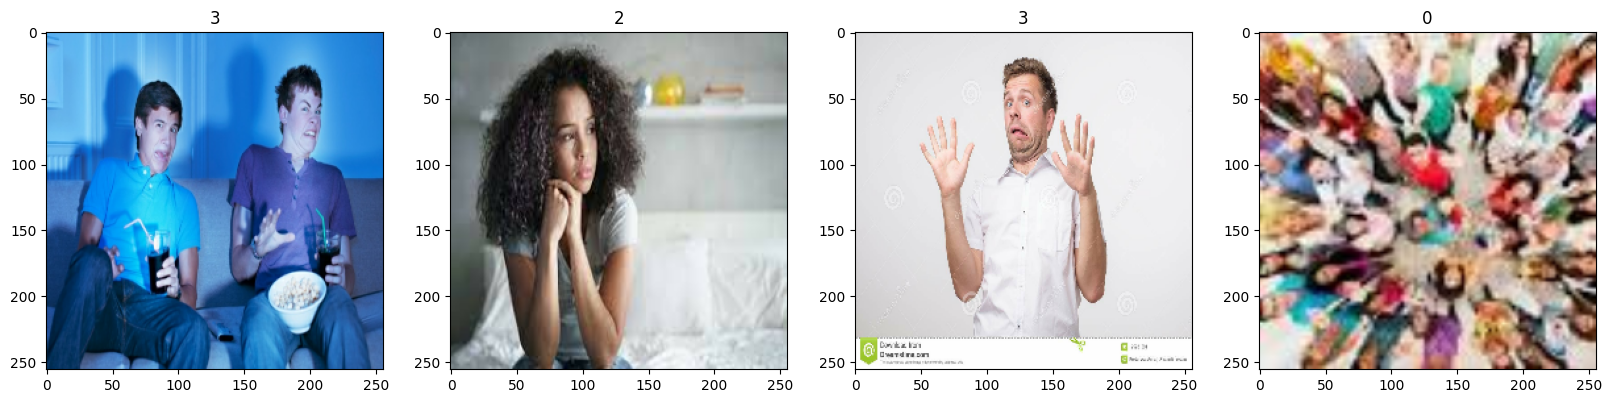

In [56]:
batch=iterator.next()
fig,ax=plt.subplots(figsize=(20,20),ncols=4)
for idx,img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])
  #0-happy
  #1-jealous
  #2-sad
  #3-scared

In [57]:
data=data.map(lambda x,y:(x/255,y)) #scaling the pixel values to a value in between 0 and 1

In [58]:
data.as_numpy_iterator().next()[0].max()

1.0

training testing and dev split 


In [59]:
train=data.take(int(len(data)*0.65)+1)
dev=data.skip(int(len(data)*0.65)+1).take(int(len(data)*0.25))
test=data.skip(int(len(data)*0.65)+1+int(len(data)*0.25)).take(int(len(data)*0.1))

In [68]:
len(train)+len(test)+len(dev)

25

In [ ]:
model=Sequential([
  Dense()  
])